# Lista 02 - Fundamentos Estatísticos para Ciência dos Dados A
- Aluno: Thiago Martin Poppe
- Matrícula: 2017014324

# Conjunto de exercícios \#1
- Usando pandas, ler os dados do arquivo ``BloodPressure01.txt``;
- Reproduzir os comandos do slide 10 de T01-RDados.pdf;
- Histograma básico do slide 13;
- Gráficos do slide 15.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pressao = pd.read_csv("BloodPressure01.txt")
pressao.head()

,sbp,gender,married,smoke,exercise,age,weight,height,overwt,race,...,g474,g475,g476,g477,g478,g479,g480,g481,g482,g483
0,133,F,N,N,3,60,159,56,3,1,...,0_0,0_0,0_1,0_1,0_1,1_1,0_0,0_0,0_1,0_1
1,115,M,N,Y,1,55,107,65,1,1,...,0_1,0_1,0_0,1_1,0_0,1_1,0_0,0_0,1_1,0_1
2,140,M,N,Y,1,18,130,59,2,1,...,0_0,0_1,0_1,0_1,0_1,0_1,0_0,0_0,1_1,0_1
3,132,M,Y,N,2,19,230,57,3,2,...,0_0,0_0,1_1,0_0,1_1,0_1,1_1,0_1,1_1,0_1
4,133,M,N,N,2,58,201,74,2,1,...,0_0,0_0,0_0,0_0,1_1,1_1,0_0,0_1,0_1,0_0


In [3]:
pressao.shape

(500, 501)

In [4]:
pressao = pressao.iloc[:, :18] # selecionando as primeiras 18 colunas
pressao.columns

Index(['sbp', 'gender', 'married', 'smoke', 'exercise', 'age', 'weight',
       'height', 'overwt', 'race', 'alcohol', 'trt', 'bmi', 'stress', 'salt',
       'chldbear', 'income', 'educatn'],
      dtype='object')

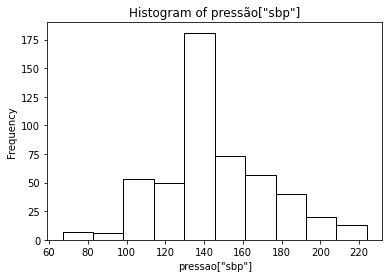

In [5]:
plt.title('Histogram of pressão["sbp"]')
plt.ylabel("Frequency")
plt.xlabel('pressao["sbp"]')
plt.hist(pressao["sbp"], fill=False)
plt.show()

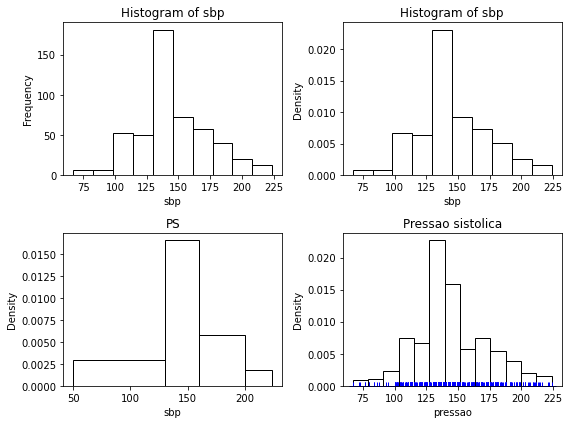

In [6]:
sbp = pressao["sbp"]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

# Primeiro plot (histograma)
ax1.set_title("Histogram of sbp")
ax1.set_xlabel("sbp")
ax1.set_ylabel("Frequency")
ax1.hist(sbp, fill=False)

# Segundo plot (histograma como distribuição de probabilidade)
ax2.set_title("Histogram of sbp")
ax2.set_xlabel("sbp")
ax2.set_ylabel("Density")
ax2.hist(sbp, density=True, fill=False)

# Terceiro plot (histograma como distribuiçãoa de probabilidade e bins)
ax3.set_title("PS")
ax3.set_xlabel("sbp")
ax3.set_ylabel("Density")
ax3.hist(sbp, density=True, bins=[50, 130, 160, 200, max(sbp)], fill=False)

# Quarto plot (histograma + rug)
ax4.set_title("Pressao sistolica")
ax4.set_xlabel("pressao")
ax4.set_ylabel("Density")
ax4.hist(sbp, density=True, bins=13, fill=False)
ax4.plot(sbp, np.zeros(sbp.shape), "b+", ms=8)  # rug plot

fig.tight_layout()
fig.show()

# Conjunto de exercícios \#2
- Usando pandas, ler os dados de população por município: arquivo ``POP2006.csv``;
- Refazer os histogramas dos slides 17 e 18.

In [7]:
pop = pd.read_csv("POP2006.csv", encoding="latin1")
pop.head()

,ESTADO,MUNICIPIO,POP2006
0,RO,Alta Floresta D'Oeste,29005
1,RO,Alto Alegre dos Parecis,15454
2,RO,Alto Paraíso,16510
3,RO,Alvorada D'Oeste,19542
4,RO,Ariquemes,86924


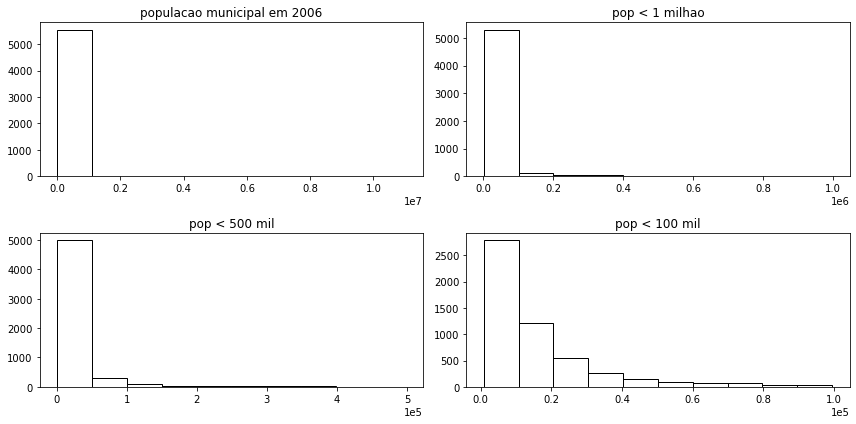

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

# Primeiro plot (histograma)
ax1.set_title("populacao municipal em 2006")
ax1.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax1.hist(pop["POP2006"], fill=False)

# Segundo plot (histograma com população menor que 1 milhão)
mask = pop["POP2006"] < 1000000
ax2.set_title("pop < 1 milhao")
ax2.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax2.hist(pop[mask]["POP2006"], fill=False)

# Terceiro plot (histograma com população menor que 500 mil)
mask = pop["POP2006"] < 500000
ax3.set_title("pop < 500 mil")
ax3.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax3.hist(pop[mask]["POP2006"], fill=False)

# Quarto plot (histograma com população menor que 100 mil)
mask = pop["POP2006"] < 100000
ax4.set_title("pop < 100 mil")
ax4.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax4.hist(pop[mask]["POP2006"], fill=False)

fig.tight_layout()
fig.show()

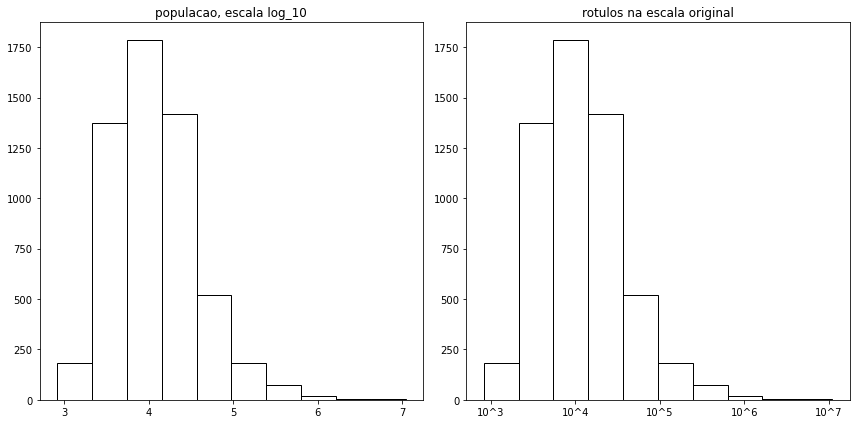

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Primeiro plot (histograma com log10 da população)
ax1.set_title("populacao, escala log_10")
ax1.hist(np.log10(pop["POP2006"]), fill=False)

# Segundo plot (histograma com log10 da população na escala original)
ax2.set_title("rotulos na escala original")
ax2.set_xticks(range(3,8))
ax2.set_xticklabels("10^{}".format(d) for d in range(3,8))
ax2.hist(np.log10(pop["POP2006"]), fill=False)

fig.tight_layout()
fig.show()

# Conjunto de exercícios \#3

- Usando pandas, ler os dados de futebol do arquivo ``CampeonatoBrasileiro2014.txt``;
- Refazer os ``stem-and-leaf`` (ramo-e-folhas) dos slides 21 e 22
    - Link para fazer gráficos ``stem-and-leaf`` em Python [aqui](https://www.geeksforgeeks.org/stem-and-leaf-plots-in-python/).

In [10]:
# Instalando o pacote stemgraphic para fazermos as visualizações desse conjunto
try:
    import stemgraphic
except Exception as e:
    print(e)
    print("Installing stemgraphic module with pip!")
    
    import sys
    !{sys.executable} -m pip install stemgraphic

In [11]:
campeonato = pd.read_csv("CampeonatoBrasileiro2014.txt")

# Removing \t (tabulation) from each column name
campeonato = campeonato.rename(columns={col: col.replace("\t", "") for col in campeonato.columns})

campeonato.head()

,Time,Pts,Jogos,Vit,Emp,Der,Gols,GolsSofr,SaldoGols,Aprov
0,Cruzeiro,80,38,24,8,6,67,38,29,70
1,Sao Paulo,70,38,20,10,8,59,40,19,61
2,Internacional,69,38,21,6,11,53,41,12,60
3,Corinthians,69,38,19,12,7,49,31,18,60
4,Atletico Mineiro,62,38,17,11,10,51,38,13,54


In [12]:
# Definindo configurações padrões para as visualizações stem-and-leafs
stem_kwargs = {
    "asc": True,        # ordenar os dados de forma ascendente
    "break_on": 20,     # limite de folhas por linha
    "compact": True,    # não exibir ramos vazios entre outros ramos
    "outliers": False,  # exibir valores extremos (mínimo e maximo)
    "legend_pos": None  # posição da "legenda" (None -> remoção da legenda)
}

In [13]:
print("Gols:", *campeonato["Gols"], "\n")

stemgraphic.stem_text(campeonato["Gols"], **stem_kwargs)
plt.show()

Gols: 67 59 53 49 51 61 36 43 42 46 36 38 37 42 39 34 37 31 31 28 

  2 | 8
  3 | 114667789
  4 | 22369
  5 | 139
  6 | 17


In [14]:
print("Saldo de gols:", *campeonato["SaldoGols"], "\n")

stemgraphic.stem_text(campeonato["SaldoGols"], **stem_kwargs)
plt.show()

Saldo de gols: 29 19 12 18 13 19 12 1 7 -1 -10 -2 -10 -3 -5 -25 -17 -12 -17 -28 

 -2 | 85
 -1 | 77200
 -0 | 5321
  0 | 17
  1 | 223899
  2 | 9


In [15]:
print("Gols:", *campeonato["Gols"], "\n")

stem_kwargs["break_on"] = 5 # quebrar cada categoria-dígito em grupos de 5
stemgraphic.stem_text(campeonato["Gols"], **stem_kwargs)
plt.show()

Gols: 67 59 53 49 51 61 36 43 42 46 36 38 37 42 39 34 37 31 31 28 

  2 | 8
  3 | 114
    | 667789
  4 | 223
    | 69
  5 | 139
  6 | 1
    | 7


# Conjunto de exercícios \#4

- Com os dados do arquivo de pressão sistólica, refazer o box-plot simples do slide 23;
- Refazer slides 28, 29, 30, 33.

In [16]:
pressao.head()

,sbp,gender,married,smoke,exercise,age,weight,height,overwt,race,alcohol,trt,bmi,stress,salt,chldbear,income,educatn
0,133,F,N,N,3,60,159,56,3,1,2,0,35,2,2,2,2,2
1,115,M,N,Y,1,55,107,65,1,1,2,0,17,2,2,1,3,2
2,140,M,N,Y,1,18,130,59,2,1,1,0,26,3,2,1,1,3
3,132,M,Y,N,2,19,230,57,3,2,3,1,49,3,3,1,1,2
4,133,M,N,N,2,58,201,74,2,1,3,0,25,2,2,1,2,3


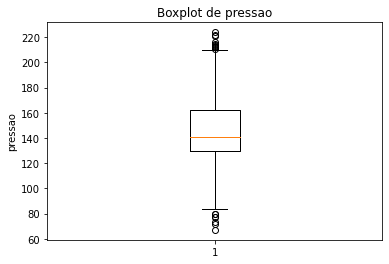

In [17]:
plt.title("Boxplot de pressao")
plt.ylabel("pressao")
plt.boxplot(pressao["sbp"])
plt.show()

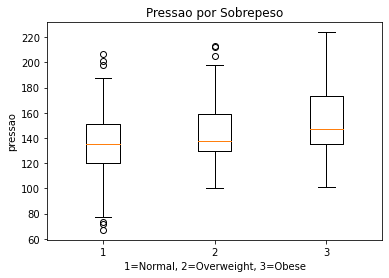

In [18]:
# Agrupando os dados pela coluna de peso (overwt -> categorias de peso)
pressao_por_peso = pressao.groupby("overwt")["sbp"]
grupos = [pressao_por_peso.get_group(i) for i in [1,2,3]]

plt.title("Pressao por Sobrepeso")
plt.ylabel("pressao")
plt.xlabel("1=Normal, 2=Overweight, 3=Obese")
plt.boxplot(grupos)
plt.show()

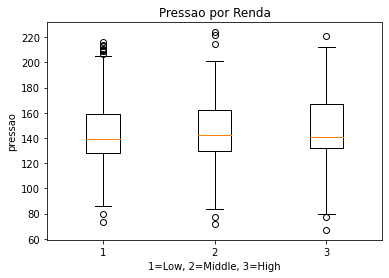

In [19]:
# Agrupando os dados pela coluna de renda (income -> categorias de renda)
pressao_por_renda = pressao.groupby("income")["sbp"]
grupos = [pressao_por_renda.get_group(i) for i in [1,2,3]]

plt.title("Pressao por Renda")
plt.ylabel("pressao")
plt.xlabel("1=Low, 2=Middle, 3=High")
plt.boxplot(grupos)
plt.show()

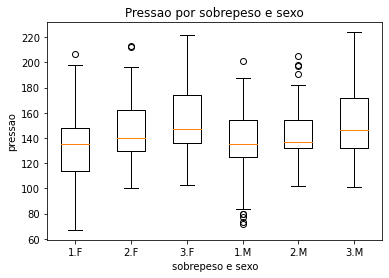

In [20]:
# Agrupando os dados pela coluna de sobrepeso e sexo
pressao_por_peso_sexo = pressao.groupby(["overwt", "gender"])["sbp"]
grupos = [pressao_por_peso_sexo.get_group((i,j)) for j in ["F","M"] for i in [1,2,3]]

plt.title("Pressao por sobrepeso e sexo")
plt.ylabel("pressao")
plt.xlabel("sobrepeso e sexo")
plt.boxplot(grupos, labels=[f"{i}.{j}" for j in ["F","M"] for i in [1,2,3]])
plt.show()

# Conjunto de exercícios \#5

- Usando os dados do arquivo ``mtcars.csv``, fazer uma matriz de scatterplots como no slide 38.
    - Ver a descrição das variáveis (que eu já não me lembrava em sala de aula) [aqui](https://rpubs.com/neros/61800).

In [21]:
mtcars = pd.read_csv("mtcars.csv")
mtcars = mtcars[["mpg", "disp", "drat", "wt"]] # filtrando apenas colunas necessárias
mtcars.head()

,mpg,disp,drat,wt
0,21.0,160.0,3.90,2.620
1,21.0,160.0,3.90,2.875
2,22.8,108.0,3.85,2.320
3,21.4,258.0,3.08,3.215
4,18.7,360.0,3.15,3.440


In [22]:
# Instalando o pacote seaborn para fazermos a visualização desse conjunto
try:
    import seaborn as sns
except Exception as e:
    print(e)
    print("Installing seaborn module with pip!")
    
    import sys
    !{sys.executable} -m pip install seaborn

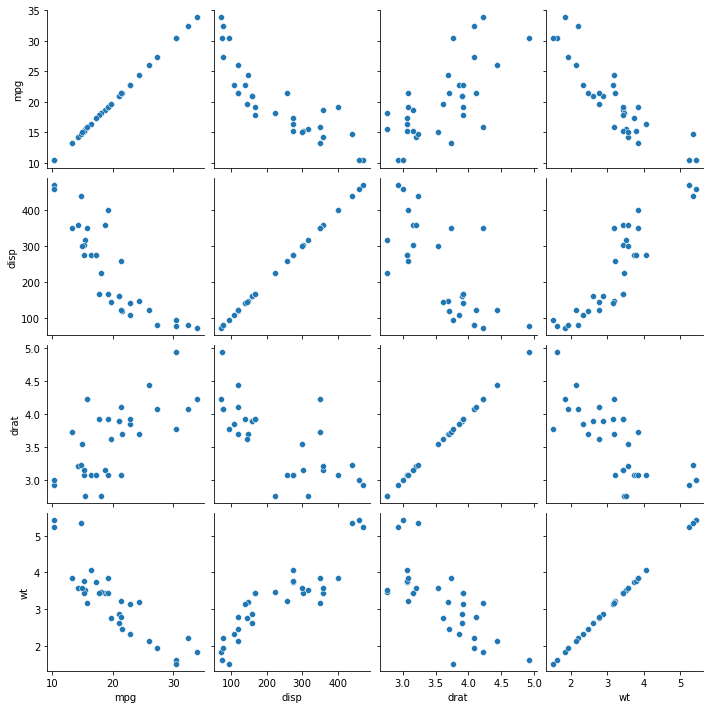

In [23]:
sns.pairplot(mtcars, diag_kind=None)